In [1]:
import pandas

In [2]:
import random as rd

In [3]:
zipcodes = pandas.read_excel('zipcode-database.xlsx', index_col=0)

In [4]:
len(zipcodes)

81830

In [5]:
zipcodes = zipcodes[zipcodes['LocationType'] != 'NOT ACCEPTABLE']

In [6]:
zipcodes = zipcodes[zipcodes['EstimatedPopulation'] >= 1]

In [7]:
zipcodes = zipcodes[zipcodes['State'].isin(['MA', 'VT', 'ME', 'NH', 'RI', 'CT'])]

In [8]:
len(zipcodes)

2506

In [9]:
from mpl_toolkits.basemap import Basemap

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
xbuf = 0.25
ybuf = 0.05
minlat = zipcodes.Lat.min()
minlon = zipcodes.Long.min()
maxlat = zipcodes.Lat.max()
maxlon = zipcodes.Long.max()
width = maxlon - minlon
height = maxlat - minlat

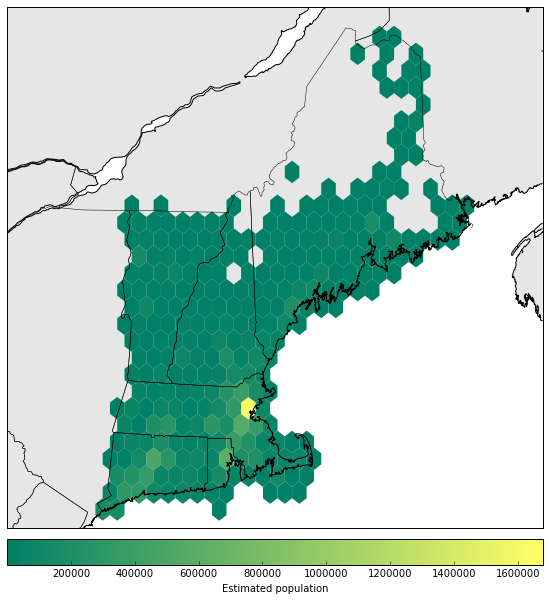

In [12]:
fig = plt.figure(figsize=(14, 10))

m = Basemap(projection='lcc', 
            llcrnrlon=minlon - width* xbuf,
            llcrnrlat=minlat - height* ybuf,
            urcrnrlon=maxlon + width* xbuf,
            urcrnrlat=maxlat + height*ybuf,
            lat_0=minlat + height/2,
            lon_0=minlon + width/2,
            resolution='h',area_thresh=10000)

m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.fillcontinents('0.9', zorder=-1)

hx = m.hexbin(
    *m(numpy.around(zipcodes['Long'].as_matrix(), 3),
    numpy.around(zipcodes['Lat'].as_matrix(), 3)),
    C=zipcodes['EstimatedPopulation'].as_matrix(),
    reduce_C_function = sum,
    gridsize= 25,
    mincnt=0,
#     norm=matplotlib.colors.LogNorm(),
    edgecolor='none',
    cmap=plt.get_cmap('summer'),
    zorder=1)

m.colorbar(location='bottom', label='Estimated population', )

plt.savefig('est_pop.png', dpi=300, alpha=True)

Generate random sample

In [13]:
rand_smpl =  zipcodes.iloc[sorted(rd.sample(range(len(zipcodes)), 50))]

In [14]:
from itertools import combinations

In [16]:
coms = combinations(rand_smpl[['Long', 'Lat']].as_matrix(), 2)
coms = list(coms)
coms = [coms[i] for i in sorted(rd.sample(range(len(coms)), 50))]

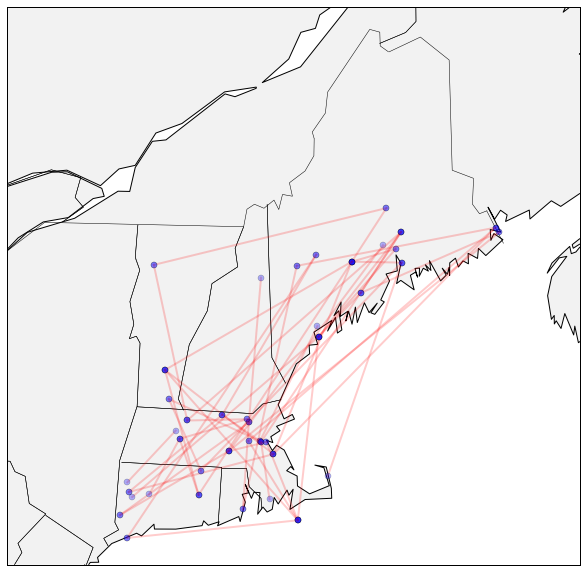

In [17]:
fig = plt.figure(figsize=(14, 10))

m = Basemap(projection='lcc', 
            llcrnrlon=minlon - width* xbuf,
            llcrnrlat=minlat - height* ybuf,
            urcrnrlon=maxlon + width* xbuf,
            urcrnrlat=maxlat + height*ybuf,
            lat_0=minlat + height/2,
            lon_0=minlon + width/2,
            resolution='l',area_thresh=10000)

m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.fillcontinents('0.95', zorder=-1)

for c in coms:
    s, f = c
    m.drawgreatcircle(*s, *f, linewidth=2, alpha=0.2, color='r')
    m.plot(*m(s[0], s[1]), color='b', alpha=0.3, marker='o')
    m.plot(*m(f[0], f[1]), color='b', alpha=0.3, marker='o' )